# EDA of Titanic Dataset and Logistic Regression

Exploratory Data Analysis on titanic dataset using [Kaggle Titanic Dataset](https://www.kaggle.com/c/titanic) and application of Logistic Regression on the dataset.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv("input/train.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Looking at the different feature of data and the Survived feature.

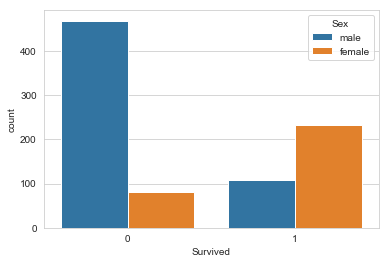

In [9]:
sns.set_style("whitegrid")
sns.countplot("Survived", hue="Sex", data=train)

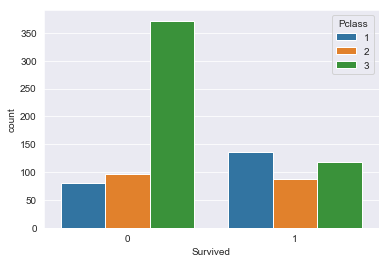

In [12]:
sns.set_style("darkgrid")
sns.countplot("Survived", data=train, hue="Pclass")

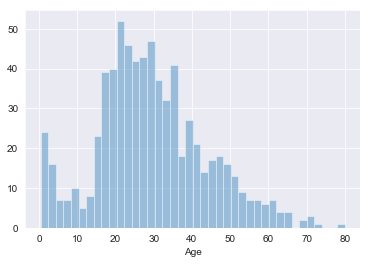

In [21]:
sns.distplot(train['Age'].dropna(), kde=False, bins=40)

In [25]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


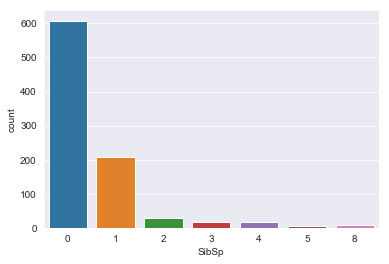

In [26]:
sns.countplot(x="SibSp", data=train)

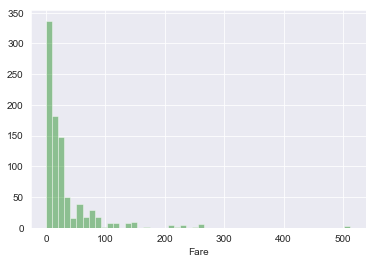

In [28]:
sns.distplot(train['Fare'], kde=False,color="green")

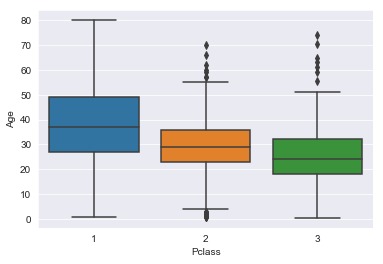

In [29]:
sns.boxplot(y=train['Age'], x=train['Pclass'])

# There is a correlation between Age and the PClass - Boxplot reveals that.

In [33]:
def impute_age(cols):
    """
    This function based on the Pclass, returns the avg age.
    """
    age = cols[0]
    pclass = cols[1]
    if pd.isnull(age):
        if pclass == 1:
            return 37
        elif pclass == 2:
            return 29
        else:
            return 24
    else:
        return age
    

In [34]:
train['Age'] = train[['Age', "Pclass"]].apply(impute_age, axis=1)

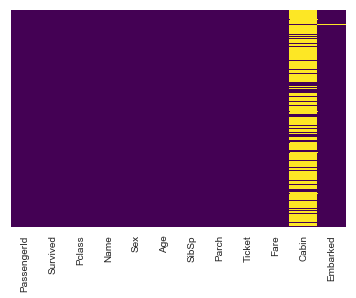

In [38]:
sns.heatmap(data=train.isnull(), yticklabels=False, cbar=False, cmap="viridis")

# Since "Cabin" has lot of Null Value, for now dropping it.

In [39]:
train.drop("Cabin", axis=1, inplace=True)

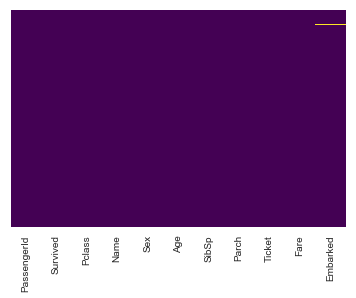

In [42]:
sns.heatmap(data=train.isnull(), yticklabels=False, cbar=False, cmap="viridis")

# Converting the categorical value into continous values using get_dummies.

In [43]:
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [44]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [47]:
train.drop(["Sex", "Embarked", "Name", "Ticket"], axis=1, inplace=True)

In [48]:
train = pd.concat([train, sex, embark], axis=1)

In [49]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


# Splitting of the data into test and train.

In [50]:
 from sklearn.model_selection import train_test_split

# While splitting the data, the value to be predicted will be dropped.

In [52]:
train_X, test_X, train_y, test_Y = train_test_split(train.drop("Survived", axis=1), 
                                                    train['Survived'], test_size=0.30,
                                                    random_state=101)

# Applying the Logistic Regression on the train data.

In [53]:
from sklearn.linear_model import LogisticRegression


In [54]:
logmodel = LogisticRegression()

In [55]:
logmodel.fit(train_X, train_y)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [56]:
predictions = logmodel.predict(test_X)

In [57]:
from sklearn.metrics import confusion_matrix


In [58]:
accuracy = confusion_matrix(test_y, predictions)

In [59]:
accuracy

array([[135,  19],
       [ 41,  73]])

In [60]:
from sklearn.metrics import accuracy_score

In [61]:
accuracy_score(test_Y, predictions)

0.7761194029850746

In [62]:
predictions

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1])